In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

C:\Users\Helio Junior\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
data = pd.read_csv('dados/Eleicao.csv', sep=';')
data.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


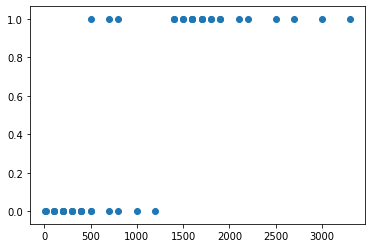

In [8]:
plt.scatter(data.DESPESAS, data.SITUACAO);

In [9]:
data.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [11]:
# CORRELACAO
np.corrcoef(data.DESPESAS, data.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [27]:
X = data.iloc[:,2].values
X = X[:, np.newaxis]
y = data.iloc[:,1].values

In [28]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Inclinação
model.coef_

array([[0.00498364]])

In [30]:
# Interceptação
model.intercept_

array([-4.60287217])

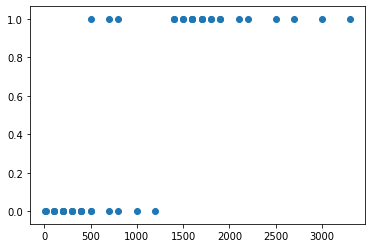

In [31]:
plt.scatter(X,y)

In [32]:
X_teste = np.linspace(10, 3000, 100)

In [33]:
X_teste

array([  10.        ,   40.2020202 ,   70.4040404 ,  100.60606061,
        130.80808081,  161.01010101,  191.21212121,  221.41414141,
        251.61616162,  281.81818182,  312.02020202,  342.22222222,
        372.42424242,  402.62626263,  432.82828283,  463.03030303,
        493.23232323,  523.43434343,  553.63636364,  583.83838384,
        614.04040404,  644.24242424,  674.44444444,  704.64646465,
        734.84848485,  765.05050505,  795.25252525,  825.45454545,
        855.65656566,  885.85858586,  916.06060606,  946.26262626,
        976.46464646, 1006.66666667, 1036.86868687, 1067.07070707,
       1097.27272727, 1127.47474747, 1157.67676768, 1187.87878788,
       1218.08080808, 1248.28282828, 1278.48484848, 1308.68686869,
       1338.88888889, 1369.09090909, 1399.29292929, 1429.49494949,
       1459.6969697 , 1489.8989899 , 1520.1010101 , 1550.3030303 ,
       1580.50505051, 1610.70707071, 1640.90909091, 1671.11111111,
       1701.31313131, 1731.51515152, 1761.71717172, 1791.91919

In [34]:
def modelo(X):
    return 1 / (1 + np.exp(-X))

In [35]:
r = modelo(X_teste * model.coef_ + model.intercept_).ravel()

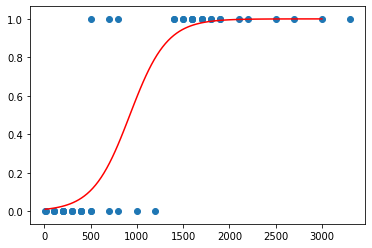

In [38]:
plt.scatter(X, y)
plt.plot(X_teste, r, color='red')

In [40]:
data_previsoes = pd.read_csv('dados/NovosCandidatos.csv', sep=';')
data_previsoes.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [41]:
despesas = data_previsoes.iloc[:,1].values
despesas = despesas.reshape(-1,1)
previsoes_teste = model.predict(despesas)

In [42]:
data_previsoes = np.column_stack((data_previsoes, previsoes_teste))

In [43]:
data_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)